# Spark Internship-Decision Tree Classifier

# Name : Abhistha Chatterjee

## Importing the required and relevant libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings("ignore")

## Importing the dataset

In [2]:
iris_=pd.read_csv("Iris_spark.csv")
iris=iris_
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Data Wrangling

In [3]:
iris.drop(["Id"],axis=1,inplace=True) #Dropping the relevant columns

In [4]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
iris.describe() #Checking out the descriptive statistics

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
iris.skew() #Checking for skewness

SepalLengthCm    0.314911
SepalWidthCm     0.334053
PetalLengthCm   -0.274464
PetalWidthCm    -0.104997
dtype: float64

## Data Visualization

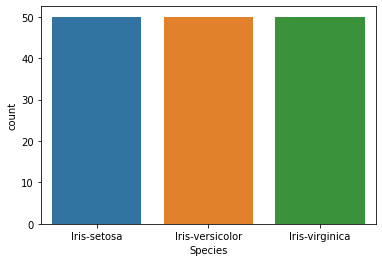

In [7]:
sns.countplot(x="Species",data=iris) #Checking for class imbalance

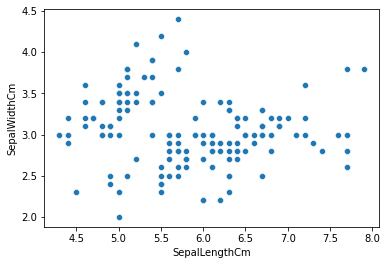

In [8]:
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', data=iris) #Checking for any relationship
plt.show()

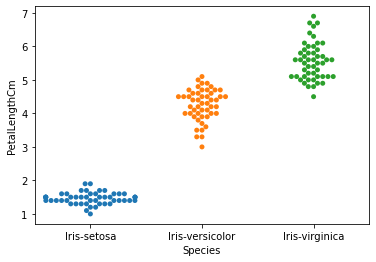

In [9]:
# Construct swarm plot for sepcies vs petal_length
sns.swarmplot(x="Species", y="PetalLengthCm", data=iris) #visualizing various classes and clusters

# Show plot
plt.show()

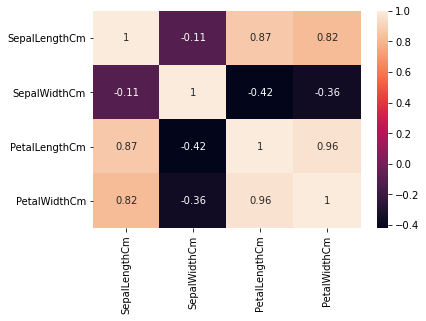

In [10]:
# Correlation matrix completely ignores any non-numeric column. 
sns.heatmap(iris.corr(), annot=True)     #Checking for correlation between various features
plt.show()

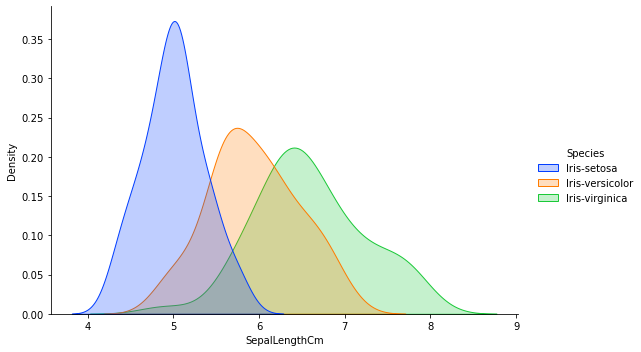

In [11]:
#Checking for the distribution of data for various classes
sns.displot(data=iris, x='SepalLengthCm', hue='Species', kind='kde', fill=True, palette=sns.color_palette('bright')[:3], height=5, aspect=1.5)

## Defining the independant and dependant variable

In [12]:
X = iris.drop('Species', axis = 1)
Y = iris[['Species']]
X.shape,Y.shape

((150, 4), (150, 1))

## Splitting the data into training and testing set.  

In [13]:
X_train, X_test,Y_train, Y_test=train_test_split(X,Y,test_size=0.25,random_state=42,stratify=Y)
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

## Defining the Decision Tree Classifier object and training the model with the training set

In [14]:
dtree=DecisionTreeClassifier()
dtree.fit(X_train,Y_train)

DecisionTreeClassifier()

## Evaluating Model performance with relevant metrics for classification algorithms 

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.92      0.92      0.92        13
 Iris-virginica       0.92      0.92      0.92        13

       accuracy                           0.95        38
      macro avg       0.95      0.95      0.95        38
   weighted avg       0.95      0.95      0.95        38



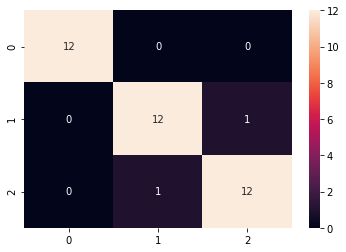

In [15]:
print(classification_report(Y_test,dtree.predict(X_test)))
cnf=confusion_matrix(Y_test,dtree.predict(X_test))
sns.heatmap(cnf,annot=True)

## Visualizing the output in the form of a tree 

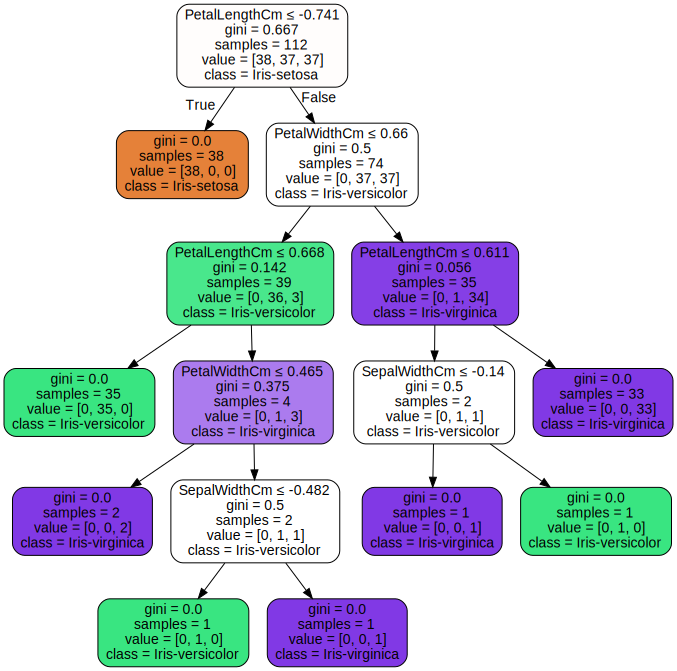

In [16]:
from sklearn.tree import export_graphviz
import graphviz

# Visualize the graph
dot_data= export_graphviz(dtree, out_file=None, 
                    feature_names=X.columns,  
                      class_names=list(iris.Species.unique()),  
                      filled=True, rounded=True,  
                      special_characters=True) 

graph1=graphviz.Source(dot_data)

graph1